# Motivation

Often when we are drawing conclusions about something, we look at it from several perspectives. A real life analogy might be when we'll have to decide whether to buy an Xbox or a playstation. We can just take the opinion of the sales person but we hardly do that. On the other hand we conduct our own research, ask our friends who have prior experience with either consoles, compare our findings and finally make an informed decision (Xbox). Similarly, one single model is not representative of an entire dataset. We might need multiple models to explain all the trends in a dataset. That's where ensemble method comes in. It combines decisions from multiple models into a single model to improve the overall performance.   

# Content
1. [What are Ensemble Methods](#tag_1)
2. [Understanding Ensemble Methods](#tag_2)
    1. [Problem Statement:](#tag_21)
    2. [Dataset Description:](#tag_22)
    3. [Dataset Preprocessing:](#tag_23)
    4. [Problem Solution 1:](#tag_24)
        1. [Fitting the Decision Tree Classifier to the dataset](#tag_241)
        2. [Visualizing our Decision Tree Classifier](#tag_242)
        3. [Testing the accuracy of our classifier](#tag_243)
    5. [Problem Solution 2:](#tag_25)
        1. [Fitting a Random Forest Classifier to the dataset](#tag_251)
        2. [Testing the accuracy of this classifier](#tag_252)
        3. [What exactly happened here?](#tag_253)
        4. [But how did this happen and what exactly is a Random Forest?](#tag_254)
        5. [Visualizing the random forest](#tag_255)
            1. [Tree 1](#tag_2551)
            2. [Tree 2](#tag_2552)
        6. [How do we create N-Decision Trees?](#tag_256)
        7. [How can N-Decision Trees be better than 1 Decision Tree?](#tag_257)
        8. [How to make the Decision Trees highly uncorrelated?](#tag_258)
    6. [Problem Solution 3:](#tag_26)
        1. [Using feature bagging](#tag_261) 
3. [Parallel and Sequential Ensemble Methods](#tag_3)
    1. [Sequential Ensemble Methods](#tag_31)
        1. [What is Boosting?](#tag_311)
        2. [What is AdaBoost?](#tag_312)
        3. [How does it work?](#tag_313)
        4. [Why is it better than a simple DecisionTree?](#tag_314)
        5. [Solution 4:](#tag_315)
4. [Advantages and Disadvantages of Ensemble Methods](#tag_4)
5. [Comparing Bagging and Boosting](#tag_5)
6. [Review Topics](#tag_6)
    1. [Decision Trees](#tag_61)
        1. [Introduction](#tag_611)
        2. [An example using scikit-learn](#tag_612)
    2. [Bias](#tag_62)
    3. [Variance](#tag_63)  
    4. [Bias-Variance Tradeoff](#tag_64)
7. [References](#tag_7)

# <a id="tag_1">What are Ensemble Methods?</a> 

It is a machine learning technique that involves combining several basic models in order to produce a better model. Here by better, we mean a model that predicts the output variable of a dataset with either more accuracy or some other form of model evaluation metric. 

**Before discussing ensemble methods, we will first review the following topics that will be useful for us to better understand the concepts involved in ensemble methods. If you are already familiar with the following topics, you can skip to the next paragraph. Otherwise, I strongly suggest that you go through the topics by clicking on the links given below.**

1. [Decision Trees](#tag_61)
2. [Bias](#tag_62)
3. [Variance](#tag_63)  
4. [Bias-Variance Tradeoff](#tag_64)

---
# <a id="tag_2">Understanding Ensemble Methods</a> 

To understand ensemble methods, we will simultaneously go through an example since I feel that's the most efficient way of learning a new concept. The problem statement of the example is described below:

**Note: The problem statement and data for this example has been taken from an assignment for my 10-601 Introduction to Machine Learning course for Spring 2018.**

## <a id="tag_21">Problem Statement:</a> 

To predict the final grade (A, not A) for high school students based on the following features/attributes: <br>
1. The student grades on 5 multiple choice assignments M1 through M5
2. 4 programming assignments P1 through P4
3. final exam F.

I will import the excel file using pandas to show how the data looks like:

In [1]:
import pandas as pd
Path = ''
train_data = pd.read_csv(Path+'education_train.csv')
train_data.head()

,M1,M2,M3,M4,M5,P1,P2,P3,P4,F,grade
0,notA,notA,A,notA,A,A,A,notA,notA,A,A
1,notA,A,A,notA,A,notA,notA,notA,A,notA,notA
2,notA,A,A,A,A,notA,A,notA,notA,A,A
3,notA,notA,notA,notA,A,A,A,notA,notA,A,notA
4,A,notA,A,A,A,A,A,notA,notA,A,A


## <a id="tag_22">Dataset Description:</a>

In the above dataset, M1,M2,M3,M4,M5 are the 5 multiple choice assignments and the grades received by the student is indicated in their respective columns. Similarly, P1,P2,P3,P4 are the programming assignments, F is the final exam and grade is the final grade of the student that we want to predict. The train dataset has 200 rows and 11 columns. The test dataset also has the same number of rows and columns.

## <a id="tag_23">Data Preprocessing:</a>

First, we need to convert the columns to numerical values in order to make our models work.

In [2]:
train_data.replace('notA',0,inplace=True)
train_data.replace('A',1,inplace=True)

**Now, we will solve this problem using multiple methods.**

## <a id="tag_24">Problem Solution 1:</a>
In the first method, we will fit a simple Decision Tree classifier to the training data. We will use the scikit-learn module to build the tree. The specifications of the Decision Tree are as follows:<br>
1. **feature selection criterion**: entropy or information gain
2. **max_depth**: 3

### <a id="tag_241">Fitting the Decision Tree Classifier to the dataset</a>

In [3]:
Xtrain = train_data.iloc[:,:-1]
ytrain = train_data.iloc[:,-1]

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 3)
clf = clf.fit(Xtrain.values,ytrain.values)

### <a id="tag_242">Visualizing our Decision Tree Classifier</a>

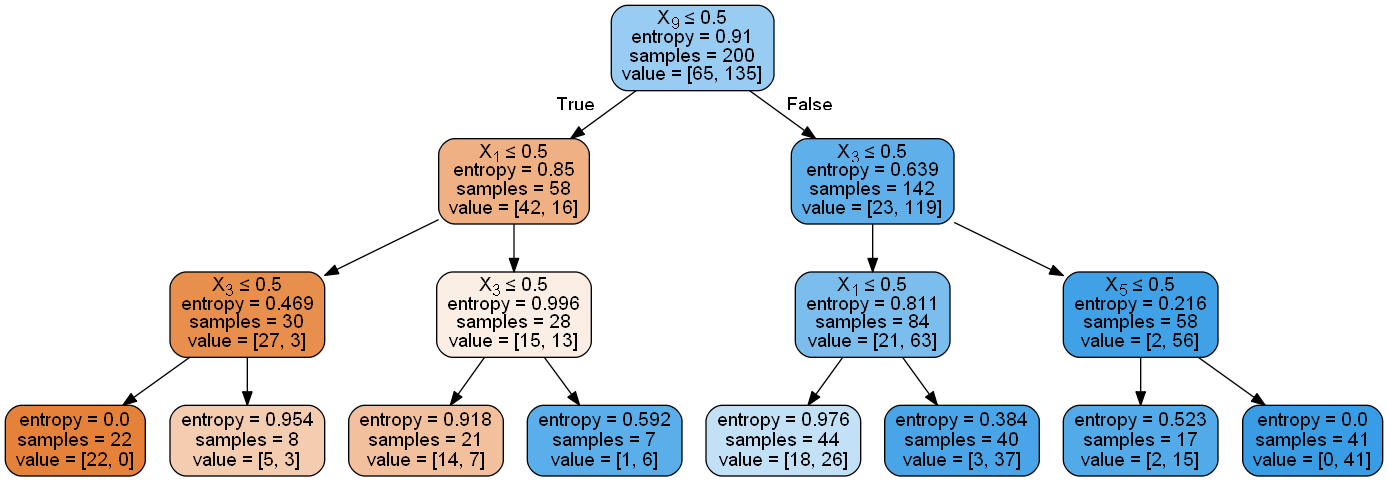

In [4]:
#visualizing the tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### <a id="tag_243">Testing the accuracy of our classifier</a>

After fitting, we will test the accuracy of this model on the test data.
To do that, we will import and process the test data similar to the train data.

In [5]:
test_data = pd.read_csv(Path + 'education_test.csv')
test_data.replace('notA',0,inplace=True)
test_data.replace('A',1,inplace=True)

Xtest = test_data.iloc[:,:-1]
ytest = test_data.iloc[:,-1]

score_simple = clf.score(Xtest,ytest)
print(f'The accuracy for the simple Decision Tree classifier is: \
{score_simple}')

The accuracy for the simple Decision Tree classifier is: 0.795


## <a id="tag_25">Problem Solution 2:</a>
In the second method, we will try to improve the model by using an ensemble model called the random forest. We will use scikit-learn's random forest classifier to build our model. 

### <a id="tag_251">Fitting a Random Forest Classifier to the dataset</a>
Here, we will use 5 estimators or trees to build this forest. This will be discussed later. Also notice that we are using the same specifications, used to build the previous decision tree, for our random forest classifier as well.

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=5,criterion='entropy',
                              max_depth=3,bootstrap=True,
                              random_state=8)
clf2.fit(Xtrain.values,ytrain.values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

### <a id="tag_252">Testing the accuracy of this classifier</a>

In [7]:
print(f'The accuracy of the random forest classifier is: \
{clf2.score(Xtest,ytest)}')

The accuracy of the random forest classifier is: 0.89


### <a id="tag_253">What exactly happened here?</a>
As we can see, the accuracy on the test dataset increased from 0.795 to 0.89. Therefore, we can say that this model is 'better' than the previous model. 

### <a id="tag_254">But how did this happen and what exactly is a Random Forest? </a>
Like a forest that consists of many trees, a Random Forest is nothing but a collection of Decision Trees. Each individual tree predicts an outcome for each test case like in solution 1 and the model's prediction is the outcome with the most votes. For eg. for the 1st test case, the simple Decision Tree predicts 'A'. Similarly, we have N-1 other Decision Trees that also give some predictions for that test case. A Random Forest takes into account the predictions of all N Decision Trees and finally predicts the outcome that is most likely out of those N outcomes. How it works is exactly like a jury. Maybe one individual in the jury gives a wrong verdict but the jury as a whole has more chance of giving the correct verdict because they can overrule that one person who gave the wrong verdict. A visual representation might be more helpful 

### <a id="tag_255">Visualizing the random forest</a>

#### <a id="tag_2551">Tree 1</a>

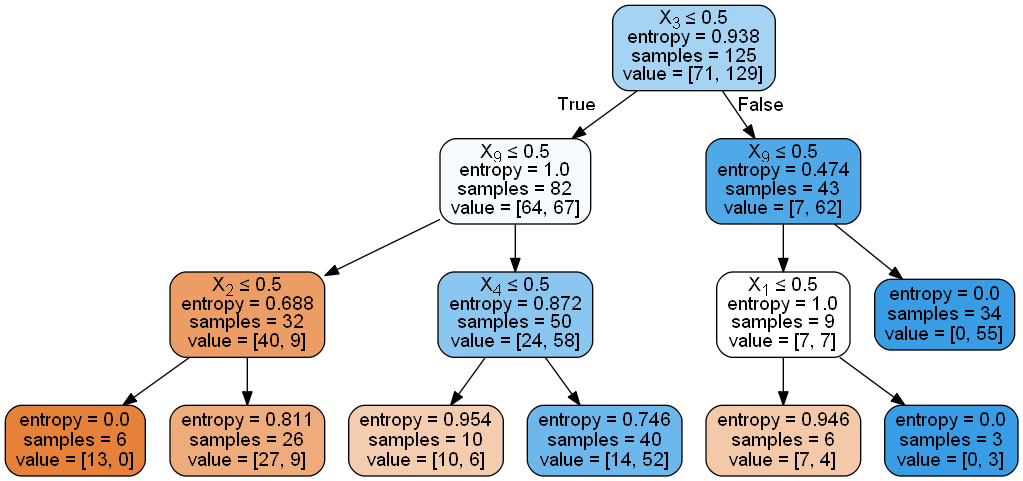

In [8]:
#visualizing the forest- estimator 1
estimator = clf2.estimators_[0]
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### <a id="tag_2552">Tree 2</a>

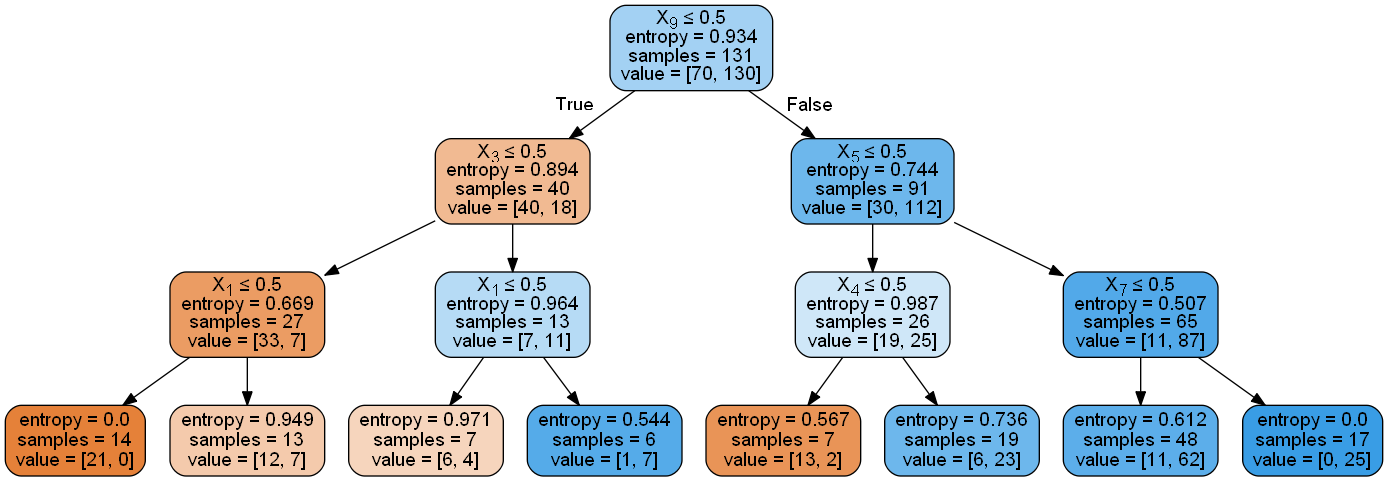

In [9]:
#visualizing the forest- estimator 2
estimator = clf2.estimators_[1]
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The trees above are the first two among 5 trees/estimators used in our random forest model. Similarly, we have 3 other decision trees, each different from the other and they are all predicting a particular final grade for a high school student. The random forest which is a collection of all these 5 trees takes into account the predictions of these 5 trees and outputs the prediction that has the maximum vote. For eg. suppose trees 1 and 2 predict that the final grade is 'A' and trees 3,4 and 5 predict that it's 'not A'. Then the random forest prediction is 'not A' since the number of instances of 'A' here is 2 and 'not A' is 3. 

### <a id="tag_256">How do we create N-Decision Trees?</a>
1. We take our training data and we divide it randomly into N samples. 
2. For each sample we create a Decision Tree.
Thus, we will have N Decision Trees. This method is called **bagging**.

### <a id="tag_257">How can N-Decision Trees be better than 1 Decision Tree?</a>
A single decision tree may suffer from overfitting. But, N Decision Trees that consider the average of all the predictions tend to cancel each others error by *reducing the variance* as long as they all don't err in the same direction. For that, the trees need to be **highly uncorrelated**.

*Variance error is variability of a target function's form with respect to different training sets. Models with small variance error will not change much if you replace couple of samples in training set. Models with high variance might be affected even with small changes in training set.*

### <a id="tag_258">How to make the Decision Trees highly uncorrelated?</a>
To do that, we use a technique called **bagging** that selects a random number of samples with replacement from the original dataset and creates a Decision Tree based on these samples. Another method that is used is called **feature bagging or feature randomness** where instead of considering every possible feature while splitting a node, we only take into account a random subset of feature for each tree. This can reduce correlation because if we take into account all the features and there is one feature that is of really high importance, then all the trees will split on that feature and that will result in a bunch of trees that behave similarly. To avoid that we use feature bagging.

## <a id="tag_26">Problem Solution 3:</a>

### <a id="tag_261">Using feature bagging</a>
In the third method, we go a step further and use feature bagging technique introduced above to further increase the performance of the model. Scikit learn's extra trees classifier does exactly that.

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

clf3 = ExtraTreesClassifier(n_estimators=10,criterion='entropy',
                                max_depth=3,bootstrap=True,random_state=192)
clf3.fit(Xtrain.values,ytrain.values)


print(f'The accuracy of the random forest classifier with feature bagging technique is: \
{clf3.score(Xtest,ytest)}')

The accuracy of the random forest classifier with feature bagging technique is: 0.91


As evident, we have significantly increased the accuracy of our model from 0.795 to 0.91 using bagging and feature randomness techniques.

---

# <a id="tag_3">Parallel and Sequential Ensemble Methods</a>

What we have seen till now is just one family of ensemble methods called ***parallel ensemble methods***. Here, the basic models are generated in parallel and we take advantage of their independence or uncorrelation to come up with a better model. This strategy is also called bagging as discussed above. Eg. Random Forest Classifier is a type of parallel ensemble method. There is another family of methods called the ***sequential ensemble methods.***

## <a id="tag_31">Sequential Ensemble Methods:</a>
Unlike the parallel ensemble method that focusses on bagging, the sequential ensemble methods focuses on a technique called boosting. Adaboost is the oldest form of boosting algorithm and we are going to cover it in details.

### <a id="tag_311">What is Boosting?</a>
Unlike bagging that had each model run independently and then aggregate the outputs at the end without any preference to any model, boosting involves creating multiple sequential models, each correcting the errors of the previous model and having a weight attached to it based on the number of observations that it correctly predicted. Finally, we make predictions using a weighted average of all the predictions made by the sequence of models.     

### <a id="tag_312">What is AdaBoost?</a>
It is a boosting algorithm that fits a sequence of weak models on repeatedly modified versions of the data. 

### <a id="tag_313">How does it work?</a>
1. Initially, we assign weights to all the samples and set those weights to 1/N, N being the total number of samples.
2. Then we choose the basic model or the weak learner as a decision tree with a single split (called a decision stump) and train that tree on the weighted dataset.
3. Using this model, predictions are made on dataset.
4. Now, we calculate the errors by comparing the predictions and the actual values.
5. We assign a weight to that classifier based on it's error rate.
6. Next we update the weights of the training examples by giving higher weights to those data points that were classified incorrectly.
7. We train a new decision stump based on those updated weights.
8. We repeat the learning algorithm using the new model until the error function does not change or the maximum limit of the number of estimators is reached.
9. Finally, we make predictions based on the weighted average of all the weak classifiers.  

### <a id="tag_314">Why is it better than a simple DecisionTree?</a>
Boosting *reduces the bias* and *the variance* of a model.

*Bias error is due to our assumptions about target function. The more assumptions(restrictions) we make about target functions, the more bias we introduce. Models with high bias are less flexible because we have imposed more rules on the target functions.*

### <a id="tag_315">Solution 4:</a>
Here, we will use Adaboost to increase the performance of our model. Again, we will use scikit learn to build the model and visualize it.

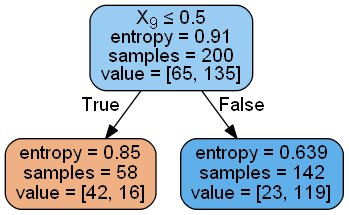

In [11]:
from sklearn.ensemble import AdaBoostClassifier
clf_stump = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 1)
clf_stump.fit(Xtrain.values,ytrain.values)

#visualizing the stump
dot_data = StringIO()
export_graphviz(clf_stump, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The above decision stump is the basic model and we keep on training similar stumps using re-weighted examples and produce a sequence of models. Each model is again individually weighted based on their error rates over the entire dataset. While prediction, we use the weighted average predictions of all these models thus prefering the ones with the higher weights.  

In [12]:
clf4 = AdaBoostClassifier(clf_stump,n_estimators=5)
clf4.fit(Xtrain.values,ytrain.values)

print(f'The accuracy of the AdaBoost classifier is: \
{clf4.score(Xtest,ytest)}')

The accuracy of the AdaBoost classifier is: 0.89


# <a id="tag_4">Advantages and Disadvantages of Ensemble Methods</a>

| Advantages | Disadvantages |
| --- | --- |
|1. *More accurate predicitons* |1. *Higher computation time* |
|2. *Stable and Robust Model* |2. *Reduction in model interpretability* |

# <a id="tag_5">Comparing Bagging and Boosting</a>

In this particular example, we saw that Boosting and bagging performed equally well. However that is not always the case. Bagging and Boosting **both increase the robustness of a model** but whether we should use bagging or boosting depends on the basic model that we have built. If the **basic model has a very high bias, then we should go with boosting** since bagging hardly reduces the bias. If on the other hand **the model suffers from overfitting, then bagging is the best option** since boosting itself often suffers from overfitting. For this reason, more often than not Bagging is more effective than Boosting. 

*Note: There is another boosting technique called Gradient Boosting which is beyond the scope of this tutorial. If you are interested, please go through this link: https://medium.com/greyatom/a-quick-guide-to-boosting-in-ml-acf7c1585cb5*

# <a id="tag_6">Review Topics</a>

## <a id="tag_61">Decision Trees</a> 

### <a id="tag_611">Introduction</a>

Inspite of being one of the simplest and the most easily interpretable machine learning model, Decision Trees are also extremely useful particularly as a classifier. 

A Decision Tree is a tree like graph with nodes. The nodes represent the features or attributes on which it makes a decision. The tree asks a simple question to the node/attribute. The branch represents the outcome. For eg: imagine that you have two things to do during the weekend, watch a movie or go and play outside. What you will do depends on the weather outside which can be rainy or sunny. If the weather is sunny, then you will go outside and play while if it is rainy you will watch a movie at home. Here, weather is the attribute, whether it's rainy or sunny is the question to the attribute and the two branches are watching a movie or playing outside which are the two outcomes.

![](DT_Stump.png)

Now, imagine you can do four things during the weekend: go shopping, watch a movie, play tennis or just stay in. What you do depends on three things: the weather (windy, rainy or sunny); how much money you have (rich or poor) and whether your parents are visiting. You need to select your priorities and make decisions according to your priorities. Here for eg: your top priority is whether your parents are visiting (called the root node in a decision tree). If they are, then you will all go to the cinemas otherwise you will have to make a decision based on the weather which is your second priority. If the weather is sunny, then you will go and play tennis, if it is rainy then you will just stay in and sleep or if it's windy, then you will decide whther to go for shopping or to the cinemas which again depends on the amount of money you have, your third priority. The tree looks like this:

![](DT_big.gif)

For someone like you, selecting the priority is easy but a decision tree needs to be trained so that it knows how to select which attribute at every step. Some of the most commonly used set of rules or algorithms that will help the decision tree to select the most important attribute out of multiple attributes are the following:
 
1. ID3
2. CART

If you want to dig deep into the above mentioned algorithms then check out this link: http://www.shoguntoolbox.org/static/notebook/current/DecisionTrees.html


Now that we have discussed how a decision tree works, we will look at an actual problem statement and learn how to create a decision tree classifier using scikit-learn. 

### <a id="tag_612">An example using scikit-learn</a>

As an example, we will use the Iris dataset available in scikit-learn. This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length. The rows are the samples and the columns are Sepal Length, Sepal Width, Petal Length and Petal Width. The iris type is 0 for Setosa, 1 for Versicolour and 2 for Virginica. Let's have a look at the dataset below:

In [13]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data,columns = ['Sepal_Length', 'Sepal_Width', 
                                       'Petal_Length', 'Petal_Width'])

df ['Iris_type']=data.target
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Iris_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now that we have imported the dataset, we wish to predict the Iris_type using information about the length and width of it's sepal and petal. We will use a decision tree to help us make predictions about the type of iris. To do that, the first thing that we need to do is to create a train-test split of the dataset. We will do that using scikit-learn's train test split function. 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target,
                                    test_size=0.2,random_state=10)

We will use the training dataset to train a decision tree classifier using scikit learn. 

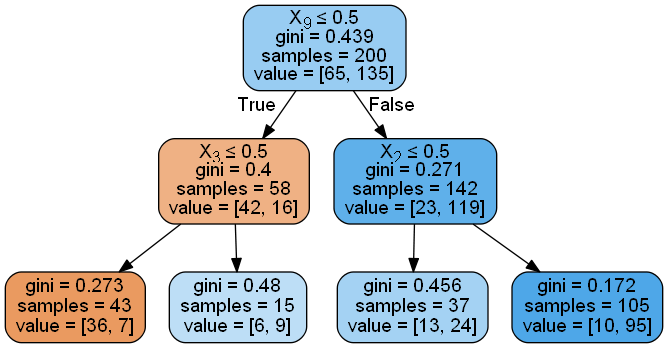

In [15]:
train_clf = tree.DecisionTreeClassifier(max_depth=2)
train_clf = train_clf.fit(Xtrain,ytrain)
#visualizing the tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(train_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Here I have declared a decision tree classifier using scikit learn and specified the maximum depth of that tree. By specifying the maximum depth, I am stopping the tree from growing further that 2 nodes from the root node. This is done to prevent over-fitting but I am doing it here so that we can better visualize the tree. After creating the tree instance, I used the fit method to train the tree on my training dataset. Once the tree is trained, I can visualize it using the export_graphviz module of scikit learn. The image above shows how the tree selected a primary attribute to split the dataset and then went on to select another one to move towards it's goal of finding the type of iris. Finally, we will test the score of the tree on the test dataset. For that, we will use the score method in scikit learn.

In [16]:
print(f'The accuracy of the trained Decision Tree  classifier is: \
{train_clf.score(Xtest,ytest)}')

The accuracy of the trained Decision Tree  classifier is: 0.79


##  <a id="tag_62">Bias</a> 

Often we make multiple assumptions to simplify our model so that we can efficiently train it using minimal time and memory. Bias is the direct consequence of such assumptions. It is a phenomenon that occurs when an algorithm produces results that are systematically prejudiced due to erroneous assumptions. We can also look at it as the difference between the average prediction of our model and the correct value that we are trying to predict. A model with a high bias is an oversimplified model.
Example: The majority vote classifier. Training is lightning fast but prediction accuracy is nowhere near the value that we want to achieve.  

## <a id="tag_63">Variance</a>

Variance of a model is the amount by which the model prediction will change, given different training data. Model with high variance does not generalize well and suffers from overfitting. Eg. An extremely deep decision tree that performs really well on the training dataset but fails to achieve similaraccuracy on the test dataset.   

## <a id="tag_64">Bias-Variance Tradeoff</a>

A model that is too simple will have a high bias and low variance. On the other hand, an extremely complicated model will have high variance and low bias. We need to find the perfect balance between the two when we are constructing a model. Mathematically this can be expressed as follows:

$ Error = Bias^2 + Variance + Irreducible Error $

Here, Irreducible Error is the measure of the amount of noise in the dataset and and it cannot be reduced. 

Our goal is to optimize the error in the above equation. The following graph depicts the sweet spot that gives the optimal trade-off point. It is the point that minimizes the total error curve.

![](B-V_Tradeoff.png)

# <a id="tag_7">References</a>
1. https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
2. https://blog.statsbot.co/ensemble-learning-d1dcd548e936#targetText=Ensemble%20methods%20are%20meta%2Dalgorithms,or%20improve%20predictions%20(stacking).
3. https://towardsdatascience.com/random-forests-and-decision-trees-from-scratch-in-python-3e4fa5ae4249
4. https://www.datacamp.com/community/tutorials/random-forests-classifier-python#comparison
5. https://towardsdatascience.com/understanding-random-forest-58381e0602d2
6. https://stats.stackexchange.com/questions/262794/why-does-a-decision-tree-have-low-bias-high-variance
7. https://scikit-learn.org/stable/modules/ensemble.html
8. https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
9. https://becominghuman.ai/ensemble-learning-bagging-and-boosting-d20f38be9b1e
10. https://medium.com/machine-learning-101/https-medium-com-savanpatel-chapter-6-adaboost-classifier-b945f330af06
11. https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229
12. https://searchenterpriseai.techtarget.com/definition/machine-learning-bias-algorithm-bias-or-AI-bias
13. https://medium.com/greyatom/decision-tree-intuition-a38669005cb7